More on Stress Intensity Factors
---
Another wau to find the stresses is by using complex functions to develop expressions for stress and displacement in the vicinity of an opening crack. 

For a general Westergaard stress function, $\psi$, we derive the stresses

$$
\sigma_x = \text{Re}\psi -y\text{Im}\psi',\quad\quad \sigma_y = \text{Re}\psi + y\text{Im}\psi',\quad\quad \tau_{xy}=-y\text{Re}\psi'.
$$

 we can show that forms for $\psi$, $\psi'$ and $\bar{\psi}$ consistent with the boundary conditions are

$$
\psi = \frac{\sigma_\infty}{\sqrt{1-a^2/z^2}}, \quad \quad \psi'=-\frac{\sigma_\infty a^2}{z^3(1-a^2/z^2)^{3/2}}, \quad \quad \bar{\psi}=\sigma_\infty z\sqrt{1-a^2/z^2}
$$

***These functions are implemented in cell below.***

In [1]:
#%matplotlib inline
import numpy as np

# complex functions
def ipsi(z,a,s_inf): 
    return s_inf*np.sqrt(z**2-a**2)
def psi(z,a,s_inf): 
    return s_inf/np.sqrt(1-a**2/z**2)
def dpsi(z,a,s_inf): 
    return -s_inf*a**2/((1-a**2/z**2)**1.5)/z**3

# stresses
def sx(z,a,s_inf):
    return np.real(psi(z,a,s_inf))-np.imag(z)*np.imag(dpsi(z,a,s_inf))
def sy(z,a,s_inf):
    return np.real(psi(z,a,s_inf))+np.imag(z)*np.imag(dpsi(z,a,s_inf))
def sxy(z,a,s_inf):
    return -np.imag(z)*np.real(dpsi(z,a,s_inf))

def u(z,par): return 2*np.real(ipsi(z,par))-np.imag(z)/(1-nu)*np.imag(psi(z,par))
def v(z,par): return 2*np.imag(ipsi(z,par))-np.imag(z)/(1-nu)*np.real(psi(z,par))

**Stress state around the crack**


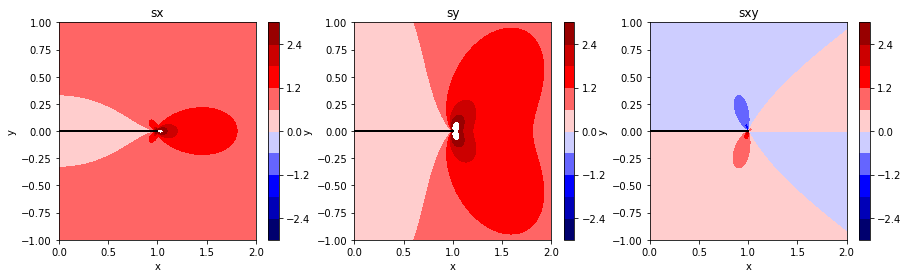

In [2]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
f,axs = plt.subplots(1,3)
f.set_size_inches(15,4)

# define parameter and plotting grid
a = 1                # crack length
s_inf = 1            # far field stress
x = np.linspace(-5*a,5*a,1000)    # plot grid
X,Y = np.meshgrid(x,x)
Z = X+Y*1j 
cmw = cm.get_cmap('seismic')   
lvls = np.linspace(-3*s_inf, 3*s_inf, 11)

for ax,s in zip(axs,[sx,sy,sxy]):
    CS = ax.contourf(X,Y,s(Z,a,s_inf),levels=lvls,cmap=cmw)
    plt.colorbar(CS,ax=ax)
    ax.set_xlim([0,2*a])
    ax.set_ylim([-a,a])
    ax.plot([-a,a],[0,0],'k-', lw=2)    # plot the fracture as a thick line
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(s.__name__)

plt.show()

***Stresses near the crack tip***

By transforming to a polar coordinate system centred at the crack tip, we approximate the crack-tip stresses in the limit $|r|<<a$

\begin{equation}
\sigma_{ij} = \frac{K_I}{\sqrt{2\pi r}}f_{ij}(\theta), \quad\quad f_{ij} = \begin{cases} 
      \cos\frac{\theta}{2}\left(1-\sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right) & ij=xx \\
      \cos\frac{\theta}{2}\left(1+\sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right) & ij=yy \\
      \cos\frac{\theta}{2}\sin\frac{\theta}{2}\cos\frac{3\theta}{2} & ij=xy 
\end{cases}, \quad\quad K_I = \sigma_\infty \sqrt{\pi a}
\end{equation}



In [3]:
from ipywidgets import interact

def fxx(theta): return np.cos(theta/2.)*(1-np.sin(theta/2.)*np.sin(3*theta/2.))
def fyy(theta): return np.cos(theta/2.)*(1+np.sin(theta/2.)*np.sin(3*theta/2.))
def fxy(theta): return np.cos(theta/2.)*np.sin(theta/2.)*np.cos(3*theta/2.)

# define parameters
a = 1
s_inf = 1
KI = s_inf*np.sqrt(np.pi*a)
    
def plot_stress(theta=0):
    f,axs = plt.subplots(1,3)
    f.set_size_inches(15,4)
    # polar coords 
    r = np.linspace(0.01*a,a,101)
    theta = theta/180*np.pi      # convert to radians
    for ax,fij,sij in zip(axs,[fxx,fyy,fxy],[sx,sy,sxy]):
        # plot the approximation
        s_approx = KI*fij(theta)/np.sqrt(2*np.pi*r)
        ax.plot(r, s_approx,'b-',label='approx.')
        # plot the true solution
        z = a+r*np.cos(theta)+1j*r*np.sin(theta)
        s_true = sij(z,a,s_inf)
        ax.plot(r, s_true,'r--',label='full soln.')
        # label plot
        ax.set_xlabel('r')
        ax.set_ylabel('s_'+fij.__name__[1:])
        ax.set_ylim([0,5])
    ax.set_ylim([-2.5,2.5])
    ax.legend()
    plt.show()
    
interact(plot_stress, theta = (0,180,10))

interactive(children=(IntSlider(value=0, description='theta', max=180, step=10), Output()), _dom_classes=('wid…

<function __main__.plot_stress(theta=0)>

***Crack displacements***

We obtain the crack-normal displacement, $v$, through integration of the $y$ strain. 

\begin{equation}
v = \frac{1-\nu^2}{E}\left(2\text{Im}\bar{\psi} - \frac{1}{1-\nu}y\text{Re}\psi\right)
\end{equation}



In [4]:
%matplotlib inline
from ipywidgets import widgets, interact
# displacement
def v(z,a,s_inf,nu,E): 
    return (1-nu**2)/E*(2*np.imag(ipsi(z,a,s_inf))-np.imag(z)/(1-nu)*np.real(psi(z,a,s_inf)))

def plot_displacement(logE):
    f,(ax1,ax2)=plt.subplots(1,2)
    f.set_size_inches([20,8])

    # plot contours of displacement
    nu = 0.25
    E = 10**logE
    lvls = np.linspace(-2,2,11)
    CS = ax1.contourf(X,Y,v(Z,a,s_inf,nu,E),levels=lvls,cmap=cmw,extend='both')
    plt.colorbar(CS,ax=ax1)
    ax1.set_xlim([0,2*a])
    ax1.set_ylim([-a,a])
    ax1.plot([-a,a],[0,0],'k-', lw=2)    # plot the fracture as a thick line
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title('crack-normal displacment')

    # plot crack opening
    x = np.linspace(0.001*a,0.9999*a,1001)
    z = x + 1j*0*x
    ax2.plot(x, v(z,a,s_inf,nu,E),'b-')
    ax2.set_xlabel('x')
    ax2.set_ylabel('v')
    ax2.set_ylim([0,6])
    ax2.set_title('Youngs modulus = {:3.2f}GPa'.format(E), size=14)
    plt.show()

interact(plot_displacement, logE = (-1,1,0.2))

interactive(children=(FloatSlider(value=0.0, description='logE', max=1.0, min=-1.0, step=0.2), Output()), _dom…

<function __main__.plot_displacement(logE)>

### K for structures

From the above figure you have probably noticed that as we move away from the crack tip, the singular term alon becomes less and less sufficient to describe the mechanical fields resulting from the applied loading. 

In order to make the SIF concept usefull we need to be able to determine K arising from the geometry and remote loading. We will show in future lessons some examples as to how this can be done. 

```{note}
An analytical closed form solution is more often than not imposible to derive
```
> Tada, H., Paris, P.C., and Irwin, G.R., **The Stress Analysis of Cracks Handbook** is a good source for finding K solutions for different geometries

### Superposition 

The stress intensity factors, arising form a **single mode** of fracture can be superimposed to obtain the overall SIF :

$$
K_I^{total} = \sum_{n}K_I^{n}
$$

This is **not** the case for $K$ arising from different modes of fracture. 

$$
K \neq K_I + K_{II}+ K_{III}
$$



### Weight functions

### K or G?

$u_y (\theta) =  \frac{ (\kappa+1) K_I (a+ \Delta a)}{2 \mu } \sqrt{\frac{\Delta a-x}{2 \pi}}$


$\sigma_{yy} = \frac{K_I(a)}{\sqrt{2 \pi x}}$

For a through crack in an infinite plate under uniaxial tension (plane stress) $G$ is given as :

$$
G = \frac{\pi \sigma ^2 a}{E`}
$$

and $K_I$ by:

$$
K_I = \sigma \sqrt{\pi a}
$$

From here we can obtain the relation 

$$
G = \frac{K_I^2}{E`}
$$


Next, we need to show that this relation is valid for other geometries and loading scenarios. 

For that, we will use the concept of closure stress. 

Assume a crack of length $a+\Delta a$ under tensile load.  We will apply a compressive stress to the crack from $x=0$ to $x=\Delta a$ such that only the length $a$ of the crack will remain open. 

We can calculate the work required for closing the crack as :

```{math}
:label: K1G
\Delta U = \int_{x=0}^{x=\Delta a}\sigma_{yy}(x)u_y(x)dx
```

And use the obtained work to estimate the energy release rate. 

$$
G = \lim_{\Delta a \to 0} \frac{\Delta U }{\Delta a}
$$

To solve, we will need to find the displacement and stresses going into {eq}'K1G'. from the mode I solution we know that 

$$
u_y (\theta) =  \frac{ (\kappa+1) K_I (a+ \Delta a)}{2 \mu } \sqrt{\frac{\Delta a-x}{2 \pi}} \\


\sigma_{yy} = \frac{K_I(a)}{\sqrt{2 \pi x}}
$$


Putting it all together we arrive at :

$$
G = \frac{(\kappa+1)K_I^2}{8 \mu} = \frac{K_I^2}{E`}
$$


Repeating the same analysis for mode II and mode III we obtain :

```{admonition} G,K relationship
$$
G = \frac{K_I^2}{E`} + \frac{K_{II}^2}{E`} + \frac{K_{III}^2}{2\mu}
$$
```



